In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                                                                                                       
from matplotlib import pyplot as plt
import time

In [2]:
gloabl_start_time = time.time()
customer_data = pd.read_csv('../data/Lending Club Loan Data/X.csv')
target = pd.read_csv('../data/Lending Club Loan Data/target.csv')
customer_data['target'] = target['y']
pd.options.display.max_columns = None
customer_data.head(10)

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,mths_since_last_delinq,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_open_trades_in_6mths,num_installment_acc_op_in_12mths,num_installment_acc_op_in_24mths,mths_since_last_installment_acc_op,num_rev_trades_op_in_12mths,num_rev_trades_op_in_24mths,max_bal_owed,bal_to_cred_lim,num_inq,num_inq_in_12mths,mths_since_recent_bankcard_delinq,mths_since_recent_revol_delinq,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,2500,13.56,84.92,C1,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,NY,18.24,0,1,NaN,9,1,4341,10.3,34,w,2386.02,167.02,113.98,53.04,0.0,2.0,1.0,2.0,2.0,2.0,7.0,2137.0,28.0,1.0,2,NaN,NaN,Cash,36,Dec,2018,1,Apr,2001,0
1,30000,18.94,777.23,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,LA,26.52,0,0,71.0,13,1,12315,24.2,44,w,29387.75,1507.11,612.25,894.86,0.0,4.0,2.0,3.0,3.0,4.0,5.0,998.0,57.0,2.0,2,NaN,NaN,Cash,60,Dec,2018,7,Jun,1987,0
2,5000,17.97,180.69,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,MI,10.51,0,0,NaN,8,0,4599,19.1,13,w,4787.21,353.89,212.79,141.10,0.0,0.0,0.0,2.0,14.0,0.0,2.0,0.0,35.0,1.0,0,NaN,NaN,Cash,36,Dec,2018,4,Apr,2011,0
3,4000,18.94,146.51,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,WA,16.74,0,0,NaN,10,0,5468,78.1,13,w,3831.93,286.71,168.07,118.64,0.0,1.0,3.0,5.0,5.0,0.0,0.0,3761.0,70.0,2.0,3,NaN,NaN,Cash,36,Dec,2018,9,Feb,2006,0
4,30000,16.14,731.78,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,MD,26.35,0,0,NaN,12,0,829,3.6,26,w,29339.02,1423.21,660.98,762.23,0.0,3.0,3.0,5.0,4.0,2.0,4.0,516.0,54.0,1.0,0,NaN,NaN,Cash,60,Dec,2018,2,Dec,2000,0
5,5550,15.02,192.45,C3,Director COE,10+ years,MORTGAGE,152500.0,Not Verified,credit_card,IN,37.94,0,3,NaN,18,0,53854,48.1,44,w,5302.50,377.95,247.50,130.45,0.0,1.0,2.0,3.0,4.0,1.0,4.0,17584.0,58.0,2.0,6,NaN,NaN,Cash,36,Dec,2018,4,Sep,2002,0
6,2000,17.97,72.28,D1,Account Manager,4 years,RENT,51000.0,Source Verified,debt_consolidation,IL,2.40,0,1,NaN,1,0,0,0.0,9,w,1914.71,141.56,85.29,56.27,0.0,0.0,2.0,3.0,7.0,0.0,1.0,0.0,100.0,0.0,1,NaN,NaN,Cash,36,Dec,2018,6,Nov,2004,0
7,6000,13.56,203.79,C1,Assistant Director,10+ years,RENT,65000.0,Source Verified,credit_card,IN,30.10,0,0,NaN,19,0,38476,69.3,37,w,5864.01,201.53,135.99,65.54,0.0,0.0,0.0,1.0,23.0,0.0,2.0,9413.0,74.0,1.0,0,NaN,NaN,DirectPay,36,Dec,2018,4,Nov,1997,0
8,5000,17.97,180.69,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,debt_consolidation,FL,21.16,0,1,32.0,8,0,8018,35.2,38,w,4786.79,353.89,213.21,140.68,0.0,5.0,5.0,5.0,3.0,1.0,6.0,3132.0,73.0,2.0,4,33.0,32.0,Cash,36,Dec,2018,3,Aug,1998,0
9,6000,14.47,206.44,C2,NaN,< 1 year,OWN,300000.0,Not Verified,debt_consolidation,CT,17.43,1,1,17.0,38,0,65950,49.8,58,w,5730.20,405.64,269.80,135.84,0.0,1.0,1.0,3.0,7.0,1.0,12.0,15926.0,48.0,2.0,2,NaN,17.0,Cash,36,Dec,2018,0,Apr,2002,0


### We have 2 139 643 records and 46 columns

In [3]:
customer_data.shape

(2139643, 46)

Data is inbalanced, around 13 % of data refer to the non-default case (0), other refer to default case (1)

In [4]:
from sklearn.model_selection import train_test_split
customer_data, _ = train_test_split(customer_data, train_size=0.2, stratify=customer_data['target'], random_state=68)
customer_data['target'].value_counts()

target
0    371985
1     55943
Name: count, dtype: int64

### Dropping columns with many NaN values

In [5]:
customer_data.isna().sum()

funded_amnt                                0
interest_rate                              0
monthly_payment                            0
grade                                      0
emp_title                              29456
emp_length                             25863
home_ownership_status                      0
annual_income                              0
verification_status                        0
loan_purpose                               0
addr_state                                 0
dept_paym_income_ratio                     0
num_30+_delinq_in_2yrs                     0
num_inq_in_6mths                           0
mths_since_last_delinq                217798
num_open_credit_lines                      0
num_derogatory_pub_rec                     0
total_credit_revolving_bal                 0
used_credit_share                          0
tot_num_credit_lines                       0
initial_list_status                        0
remaining_princ_for_tot_amnt_fund          0
paym_rec_f

In [6]:
major_nans_in_columns = customer_data.isna().sum() > 100000
customer_data = customer_data.loc[:, ~major_nans_in_columns]

In [7]:
customer_data = customer_data.dropna().reset_index(drop=True)
customer_data.shape

(398314, 34)

In [8]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,10000,8.24,314.48,B1,Operations,5 years,RENT,105000.0,Source Verified,credit_card,VA,14.56,0,0,11,0,17839,60.3,23,w,0.00,10307.046699,10000.00,307.05,0.0,1,Cash,36,Nov,2016,2,Nov,1998,0
1,2000,19.92,74.25,D3,Teacher,4 years,RENT,60000.0,Verified,other,TX,19.32,0,0,3,0,0,0.0,8,f,1787.82,370.140000,212.18,157.96,0.0,1,Cash,36,Sep,2018,7,May,2011,0
2,9800,9.49,313.88,B2,School Nurse,10+ years,RENT,90000.0,Source Verified,debt_consolidation,CA,16.53,1,0,11,0,14601,69.5,35,f,0.00,11294.389721,9800.00,1494.39,0.0,0,Cash,36,Nov,2014,9,Apr,1995,0
3,13000,7.84,262.60,A4,Senior Data Analyst,10+ years,MORTGAGE,155000.0,Not Verified,debt_consolidation,NC,5.58,0,1,16,0,5577,7.9,29,w,11916.44,1569.940000,1083.56,486.38,0.0,1,Cash,60,Aug,2018,2,Feb,2003,0
4,6000,5.32,180.69,A1,Compliance Manager,2 years,MORTGAGE,86000.0,Not Verified,credit_card,OH,14.76,0,0,6,0,16348,31.3,13,w,0.00,6224.570000,6000.00,224.57,0.0,0,Cash,36,Oct,2015,4,Jan,1996,0


In [9]:
(customer_data['funded_amnt'].value_counts().index.min(),
customer_data['funded_amnt'].value_counts().index.max())

(500, 40000)

In [10]:
# customer_data["Score_point"].value_counts()

In [11]:
# customer_data["Credit_Score"].value_counts()

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398314 entries, 0 to 398313
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   funded_amnt                        398314 non-null  int64  
 1   interest_rate                      398314 non-null  float64
 2   monthly_payment                    398314 non-null  float64
 3   grade                              398314 non-null  object 
 4   emp_title                          398314 non-null  object 
 5   emp_length                         398314 non-null  object 
 6   home_ownership_status              398314 non-null  object 
 7   annual_income                      398314 non-null  float64
 8   verification_status                398314 non-null  object 
 9   loan_purpose                       398314 non-null  object 
 10  addr_state                         398314 non-null  object 
 11  dept_paym_income_ratio             3983

In [13]:
"""describe numeric data"""
pd.set_option('display.float_format', '{:.2f}'.format)
numerical_data = customer_data.select_dtypes(["int32", "float32", "int64", "float64"]).dropna()
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,issue_date_year,region_code,earliest_cr_line_year,target
count,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00
mean,14985.15,13.06,444.54,80660.28,18.02,0.32,0.59,11.74,0.20,16860.35,50.75,24.38,3956.01,12282.55,9689.24,2449.74,1.50,1.50,42.87,2015.74,4.65,1999.66,0.13
std,9058.62,4.80,263.92,80738.04,8.36,0.88,0.90,5.67,0.58,23089.73,24.58,12.04,7065.06,9987.67,8374.18,2715.96,12.01,2.05,10.85,1.79,3.11,7.54,0.34
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,2007.00,0.00,1944.00,0.00
25%,8000.00,9.49,254.03,49000.00,11.78,0.00,0.00,8.00,0.00,6099.00,32.10,16.00,0.00,4634.34,3073.26,718.98,0.00,0.00,36.00,2015.00,2.00,1996.00,0.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11507.00,50.70,23.00,0.00,9647.38,7259.09,1531.45,0.00,1.00,36.00,2016.00,4.00,2001.00,0.00
75%,20000.00,15.80,588.08,95000.00,23.90,0.00,1.00,15.00,0.00,20449.00,69.70,31.00,5625.62,17273.08,14089.16,3129.51,0.00,2.00,60.00,2017.00,8.00,2005.00,0.00
max,40000.00,30.99,1719.83,9550000.00,49.86,35.00,27.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,60.00,2018.00,9.00,2015.00,1.00
unique,1532.00,633.00,54848.00,23625.00,4327.00,27.00,20.00,74.00,28.00,59398.00,1182.00,130.00,94254.00,345482.00,133897.00,253262.00,6032.00,37.00,2.00,12.00,10.00,68.00,2.00
var_coeff [%],60.45,36.76,59.37,100.10,46.38,279.46,152.23,48.29,296.75,136.95,48.44,49.38,178.59,81.32,86.43,110.87,802.16,136.80,25.31,0.09,66.86,0.38,259.81


In [14]:
credit_history_col_index = customer_data.columns.to_list().index('issue_date_year') + 1
customer_data.insert(credit_history_col_index, 'credit_history_age', customer_data['issue_date_year'] - customer_data['earliest_cr_line_year'])
customer_data = customer_data.drop(columns=['issue_date_month', 'issue_date_year', 'earliest_cr_line_month', 'earliest_cr_line_year'])

In [15]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,10000,8.24,314.48,B1,Operations,5 years,RENT,105000.00,Source Verified,credit_card,VA,14.56,0,0,11,0,17839,60.30,23,w,0.00,10307.05,10000.00,307.05,0.00,1,Cash,36,18,2,0
1,2000,19.92,74.25,D3,Teacher,4 years,RENT,60000.00,Verified,other,TX,19.32,0,0,3,0,0,0.00,8,f,1787.82,370.14,212.18,157.96,0.00,1,Cash,36,7,7,0
2,9800,9.49,313.88,B2,School Nurse,10+ years,RENT,90000.00,Source Verified,debt_consolidation,CA,16.53,1,0,11,0,14601,69.50,35,f,0.00,11294.39,9800.00,1494.39,0.00,0,Cash,36,19,9,0
3,13000,7.84,262.60,A4,Senior Data Analyst,10+ years,MORTGAGE,155000.00,Not Verified,debt_consolidation,NC,5.58,0,1,16,0,5577,7.90,29,w,11916.44,1569.94,1083.56,486.38,0.00,1,Cash,60,15,2,0
4,6000,5.32,180.69,A1,Compliance Manager,2 years,MORTGAGE,86000.00,Not Verified,credit_card,OH,14.76,0,0,6,0,16348,31.30,13,w,0.00,6224.57,6000.00,224.57,0.00,0,Cash,36,19,4,0


In [16]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,credit_history_age,region_code,target
count,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00
mean,14985.15,13.06,444.54,80660.28,18.02,0.32,0.59,11.74,0.20,16860.35,50.75,24.38,3956.01,12282.55,9689.24,2449.74,1.50,1.50,42.87,16.08,4.65,0.13
std,9058.62,4.80,263.92,80738.04,8.36,0.88,0.90,5.67,0.58,23089.73,24.58,12.04,7065.06,9987.67,8374.18,2715.96,12.01,2.05,10.85,7.37,3.11,0.34
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,0.00,0.00,0.00
25%,8000.00,9.49,254.03,49000.00,11.78,0.00,0.00,8.00,0.00,6099.00,32.10,16.00,0.00,4634.34,3073.26,718.98,0.00,0.00,36.00,11.00,2.00,0.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11507.00,50.70,23.00,0.00,9647.38,7259.09,1531.45,0.00,1.00,36.00,15.00,4.00,0.00
75%,20000.00,15.80,588.08,95000.00,23.90,0.00,1.00,15.00,0.00,20449.00,69.70,31.00,5625.62,17273.08,14089.16,3129.51,0.00,2.00,60.00,20.00,8.00,0.00
max,40000.00,30.99,1719.83,9550000.00,49.86,35.00,27.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,60.00,71.00,9.00,1.00
unique,1532.00,633.00,54848.00,23625.00,4327.00,27.00,20.00,74.00,28.00,59398.00,1182.00,130.00,94254.00,345482.00,133897.00,253262.00,6032.00,37.00,2.00,66.00,10.00,2.00
var_coeff [%],60.45,36.76,59.37,100.10,46.38,279.46,152.23,48.29,296.75,136.95,48.44,49.38,178.59,81.32,86.43,110.87,802.16,136.80,25.31,45.82,66.86,259.81


In [17]:
categorical_data = customer_data.select_dtypes(["object"]).dropna().reset_index(drop=True)
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method
count,398314,398314,398314,398314,398314,398314,398314,398314,398314
unique,35,138897,11,4,3,14,51,2,2
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash
freq,25475,7054,142984,193547,164090,226200,56406,266429,385082


In [18]:
# (categoric_data["Amount_invested_monthly"].value_counts(),
# categoric_data["Monthly_Balance"].value_counts())

In [19]:
# categoric_data["ID"].value_counts()

In [20]:
(numerical_data.columns.size, categorical_data.columns.size)

(22, 9)

In [21]:
"""adjusting number of rows for subplot"""
def subplot_shape(df, subplot_cols=3):
    df_ncols = df.columns.size
    if df_ncols %subplot_cols == 0:
        return (int(df_ncols / subplot_cols), subplot_cols)
    else:
        return (df_ncols // subplot_cols + 1, subplot_cols)

"""function to draw distributions for variables (columns)"""
def draw_distribution(df, subplot_size, distributions_for_numerics=True, subplot_cols=3, barplot_max_cols=20, top_n_freq=5):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    distribution_type = {}
    keys = df.columns.values
    distribution_type = distribution_type.fromkeys(keys)

    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        top_frequent = ''
        data = df[col].dropna().reset_index(drop=True)
        val_counts = data.value_counts()
        if data.dtype == 'object':
            if len(val_counts.index) <= barplot_max_cols / 2:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
            else:
                top_frequent = f" - TOP {top_n_freq} categories"
                sns.barplot(x=val_counts.index[0:top_n_freq], y=val_counts.values[0:top_n_freq], ax=ax, edgecolor='black')
            plot_type = 'barplot'
        else:  # distributions_for_numerics:
            if len(val_counts.index) <= barplot_max_cols:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
                plot_type = 'barplot'
            else:
                sns.histplot(data=data, bins='auto', ax=ax, edgecolor='black')
                plot_type = 'histogram'
        ax.set_title(f"{col}{top_frequent}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        distribution_type[col] = plot_type
        # Counter for drawing charts process
        print(f'\rDrawing distribution plots [{iter+1}/{num_cols}]', end='', flush=True)
    for i, item in enumerate(distribution_type.items()):
        if i == 0:
            print('\n')
        print(item)
    plt.tight_layout()
    plt.show()

In [22]:
subplot_shape(numerical_data)

(8, 3)

Drawing distribution plots [31/31]

('funded_amnt', 'histogram')
('interest_rate', 'histogram')
('monthly_payment', 'histogram')
('grade', 'barplot')
('emp_title', 'barplot')
('emp_length', 'barplot')
('home_ownership_status', 'barplot')
('annual_income', 'histogram')
('verification_status', 'barplot')
('loan_purpose', 'barplot')
('addr_state', 'barplot')
('dept_paym_income_ratio', 'histogram')
('num_30+_delinq_in_2yrs', 'histogram')
('num_inq_in_6mths', 'barplot')
('num_open_credit_lines', 'histogram')
('num_derogatory_pub_rec', 'histogram')
('total_credit_revolving_bal', 'histogram')
('used_credit_share', 'histogram')
('tot_num_credit_lines', 'histogram')
('initial_list_status', 'barplot')
('remaining_princ_for_tot_amnt_fund', 'histogram')
('paym_rec_for_tot_amnt_fund', 'histogram')
('princ_rec', 'histogram')
('interest_rec', 'histogram')
('late_fees_rec', 'histogram')
('num_inq_in_12mths', 'histogram')
('disbursement_method', 'barplot')
('loan_term_months', 'barplot')
('credit_histo

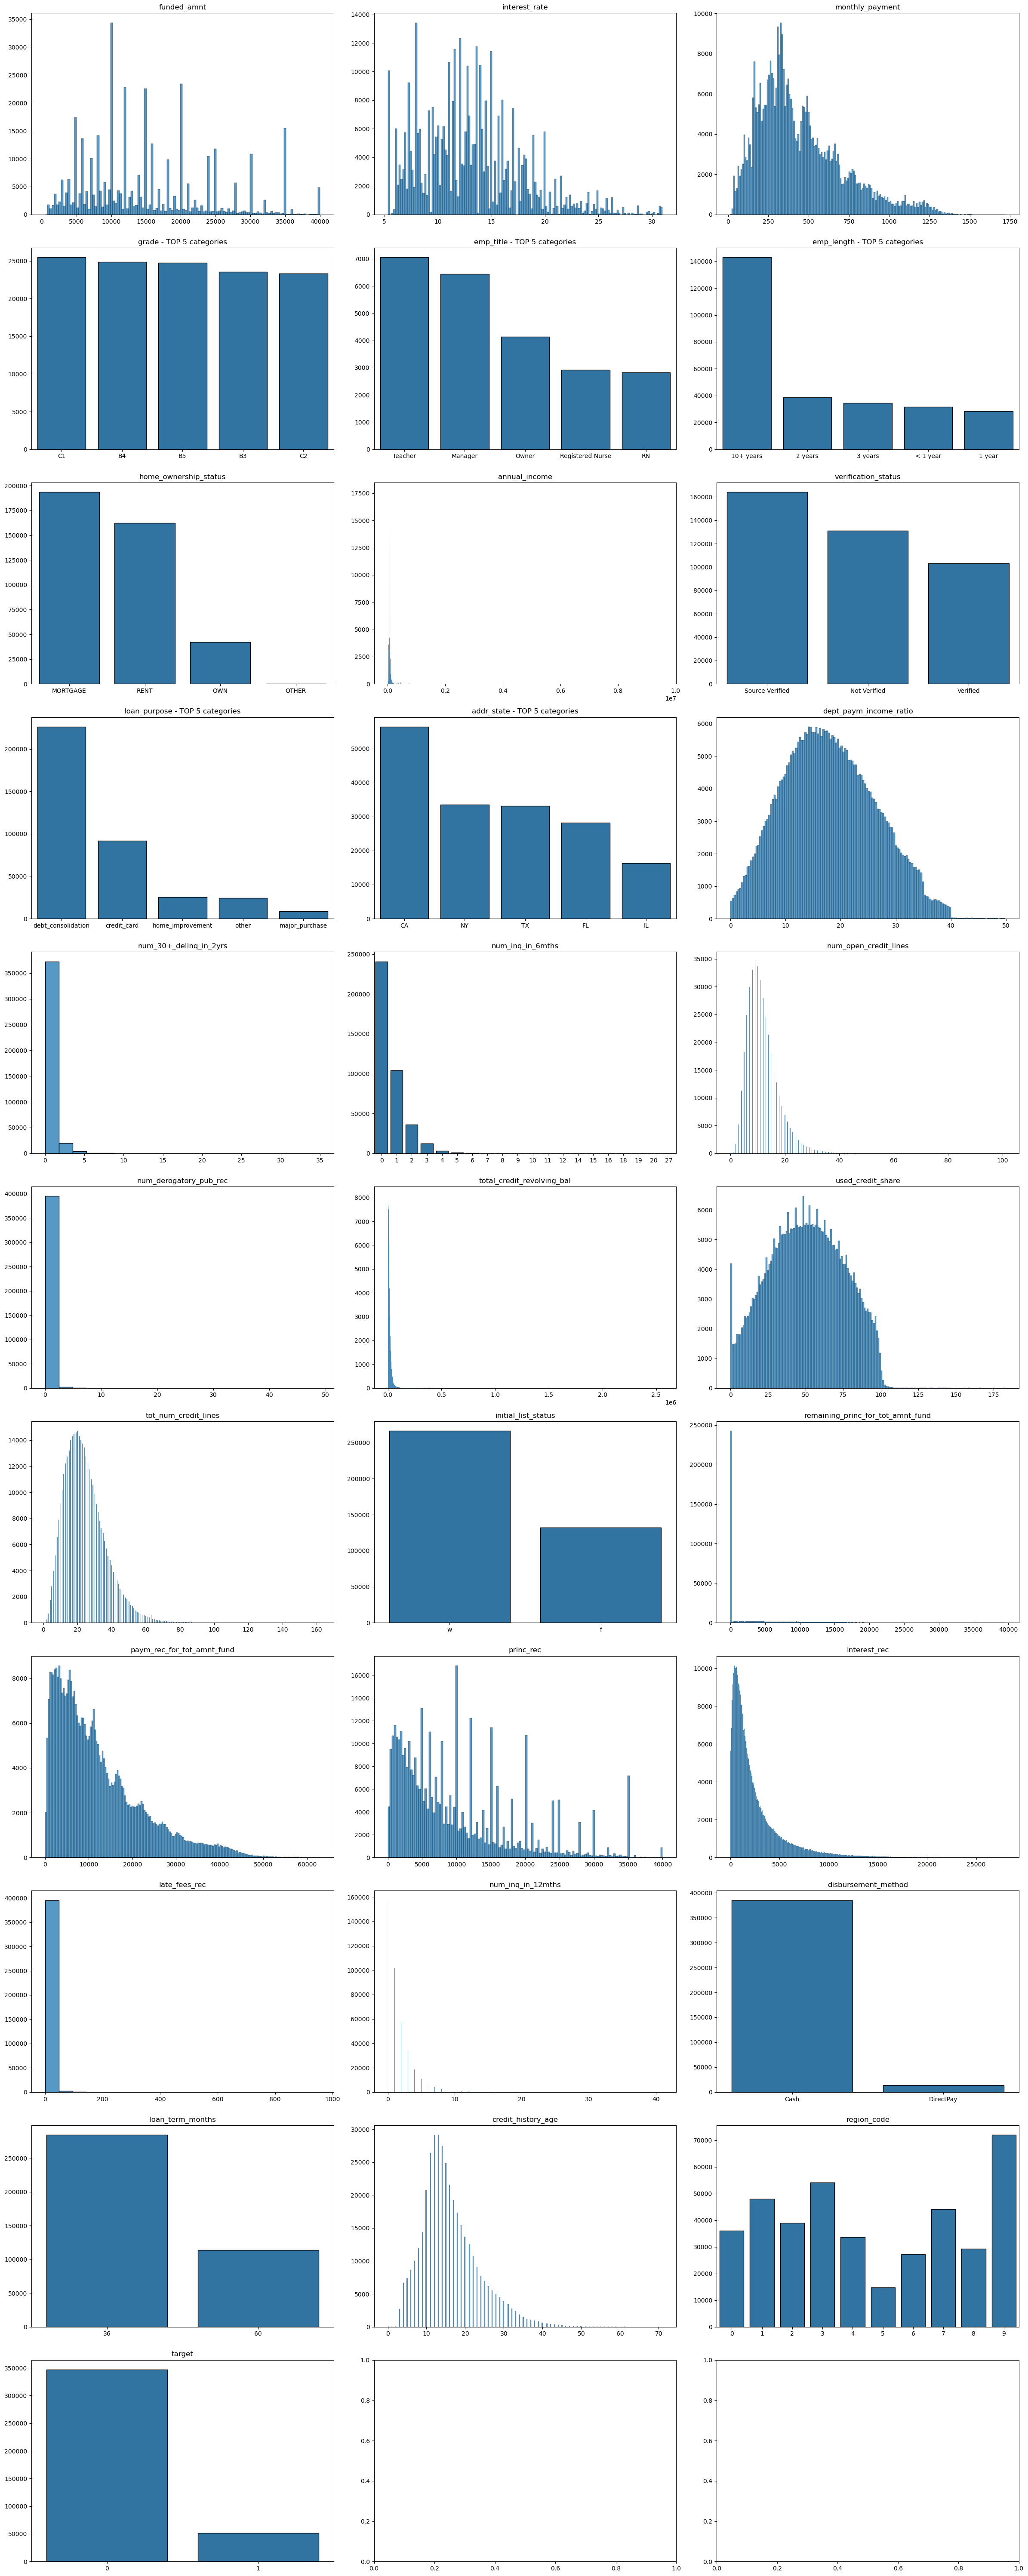

In [23]:
draw_distribution(customer_data, subplot_size=(24, 60), subplot_cols=3)

### "loan_term_months" column has only 2 values so we can treat it as category variable as well as for the "region_code" variable

In [24]:
customer_data['loan_term_months'] = customer_data['loan_term_months'].astype('object')
customer_data['region_code'] = customer_data['region_code'].astype('object')
categorical_data = customer_data.select_dtypes(['object'])
categorical_data.head()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
0,B1,Operations,5 years,RENT,Source Verified,credit_card,VA,w,Cash,36,2
1,D3,Teacher,4 years,RENT,Verified,other,TX,f,Cash,36,7
2,B2,School Nurse,10+ years,RENT,Source Verified,debt_consolidation,CA,f,Cash,36,9
3,A4,Senior Data Analyst,10+ years,MORTGAGE,Not Verified,debt_consolidation,NC,w,Cash,60,2
4,A1,Compliance Manager,2 years,MORTGAGE,Not Verified,credit_card,OH,w,Cash,36,4


Categorical and numerical statistics (after adjusting variables to the proper groups of data)

In [25]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,398314,398314,398314,398314,398314,398314,398314,398314,398314,398314,398314
unique,35,138897,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,25475,7054,142984,193547,164090,226200,56406,266429,385082,284264,72024


In [26]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target
0,10000,8.24,314.48,105000.00,14.56,0,0,11,0,17839,60.30,23,0.00,10307.05,10000.00,307.05,0.00,1,18,0
1,2000,19.92,74.25,60000.00,19.32,0,0,3,0,0,0.00,8,1787.82,370.14,212.18,157.96,0.00,1,7,0
2,9800,9.49,313.88,90000.00,16.53,1,0,11,0,14601,69.50,35,0.00,11294.39,9800.00,1494.39,0.00,0,19,0
3,13000,7.84,262.60,155000.00,5.58,0,1,16,0,5577,7.90,29,11916.44,1569.94,1083.56,486.38,0.00,1,15,0
4,6000,5.32,180.69,86000.00,14.76,0,0,6,0,16348,31.30,13,0.00,6224.57,6000.00,224.57,0.00,0,19,0


In [27]:
numerical_data_describe = numerical_data.loc[:, numerical_data.columns != 'target'].describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe.loc['median'] = numerical_data.median()
numerical_data_describe.loc['skew'] = numerical_data.skew()
numerical_data_describe.loc['kurtosis'] = numerical_data.kurtosis()
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age
count,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00,398314.00
mean,14985.15,13.06,444.54,80660.28,18.02,0.32,0.59,11.74,0.20,16860.35,50.75,24.38,3956.01,12282.55,9689.24,2449.74,1.50,1.50,16.08
std,9058.62,4.80,263.92,80738.04,8.36,0.88,0.90,5.67,0.58,23089.73,24.58,12.04,7065.06,9987.67,8374.18,2715.96,12.01,2.05,7.37
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,8000.00,9.49,254.03,49000.00,11.78,0.00,0.00,8.00,0.00,6099.00,32.10,16.00,0.00,4634.34,3073.26,718.98,0.00,0.00,11.00
50%,12925.00,12.62,378.20,68000.00,17.53,0.00,0.00,11.00,0.00,11507.00,50.70,23.00,0.00,9647.38,7259.09,1531.45,0.00,1.00,15.00
75%,20000.00,15.80,588.08,95000.00,23.90,0.00,1.00,15.00,0.00,20449.00,69.70,31.00,5625.62,17273.08,14089.16,3129.51,0.00,2.00,20.00
max,40000.00,30.99,1719.83,9550000.00,49.86,35.00,27.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,71.00
unique,1532.00,633.00,54848.00,23625.00,4327.00,27.00,20.00,74.00,28.00,59398.00,1182.00,130.00,94254.00,345482.00,133897.00,253262.00,6032.00,37.00,66.00
var_coeff [%],60.45,36.76,59.37,100.10,46.38,279.46,152.23,48.29,296.75,136.95,48.44,49.38,178.59,81.32,86.43,110.87,802.16,136.80,45.82


In [28]:
"""function to determine number of outlier values in a dataframe column"""
def number_of_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

"""function for drawing boxplots"""
def draw_boxplots(df, subplot_size=(16, 10), subplot_cols=3):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    num_outliers = []
    
    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        boxplot = sns.boxplot(data=df[col], ax=ax)
        num_outliers.append( number_of_outliers(df[col]) )
        ax.set_title(col)
        ax.set_ylabel('')
        ax.grid()
        print(f'\rDrawing boxplots [{iter+1}/{num_cols}]', end='', flush=True)
    print(f'\n{num_outliers}')
    plt.tight_layout()
    plt.show()

Drawing boxplots [19/19]
[5106, 8100, 12380, 20673, 289, 75992, 17330, 10050, 61859, 24230, 26, 9006, 39150, 13893, 11374, 29220, 15105, 19033, 10624]


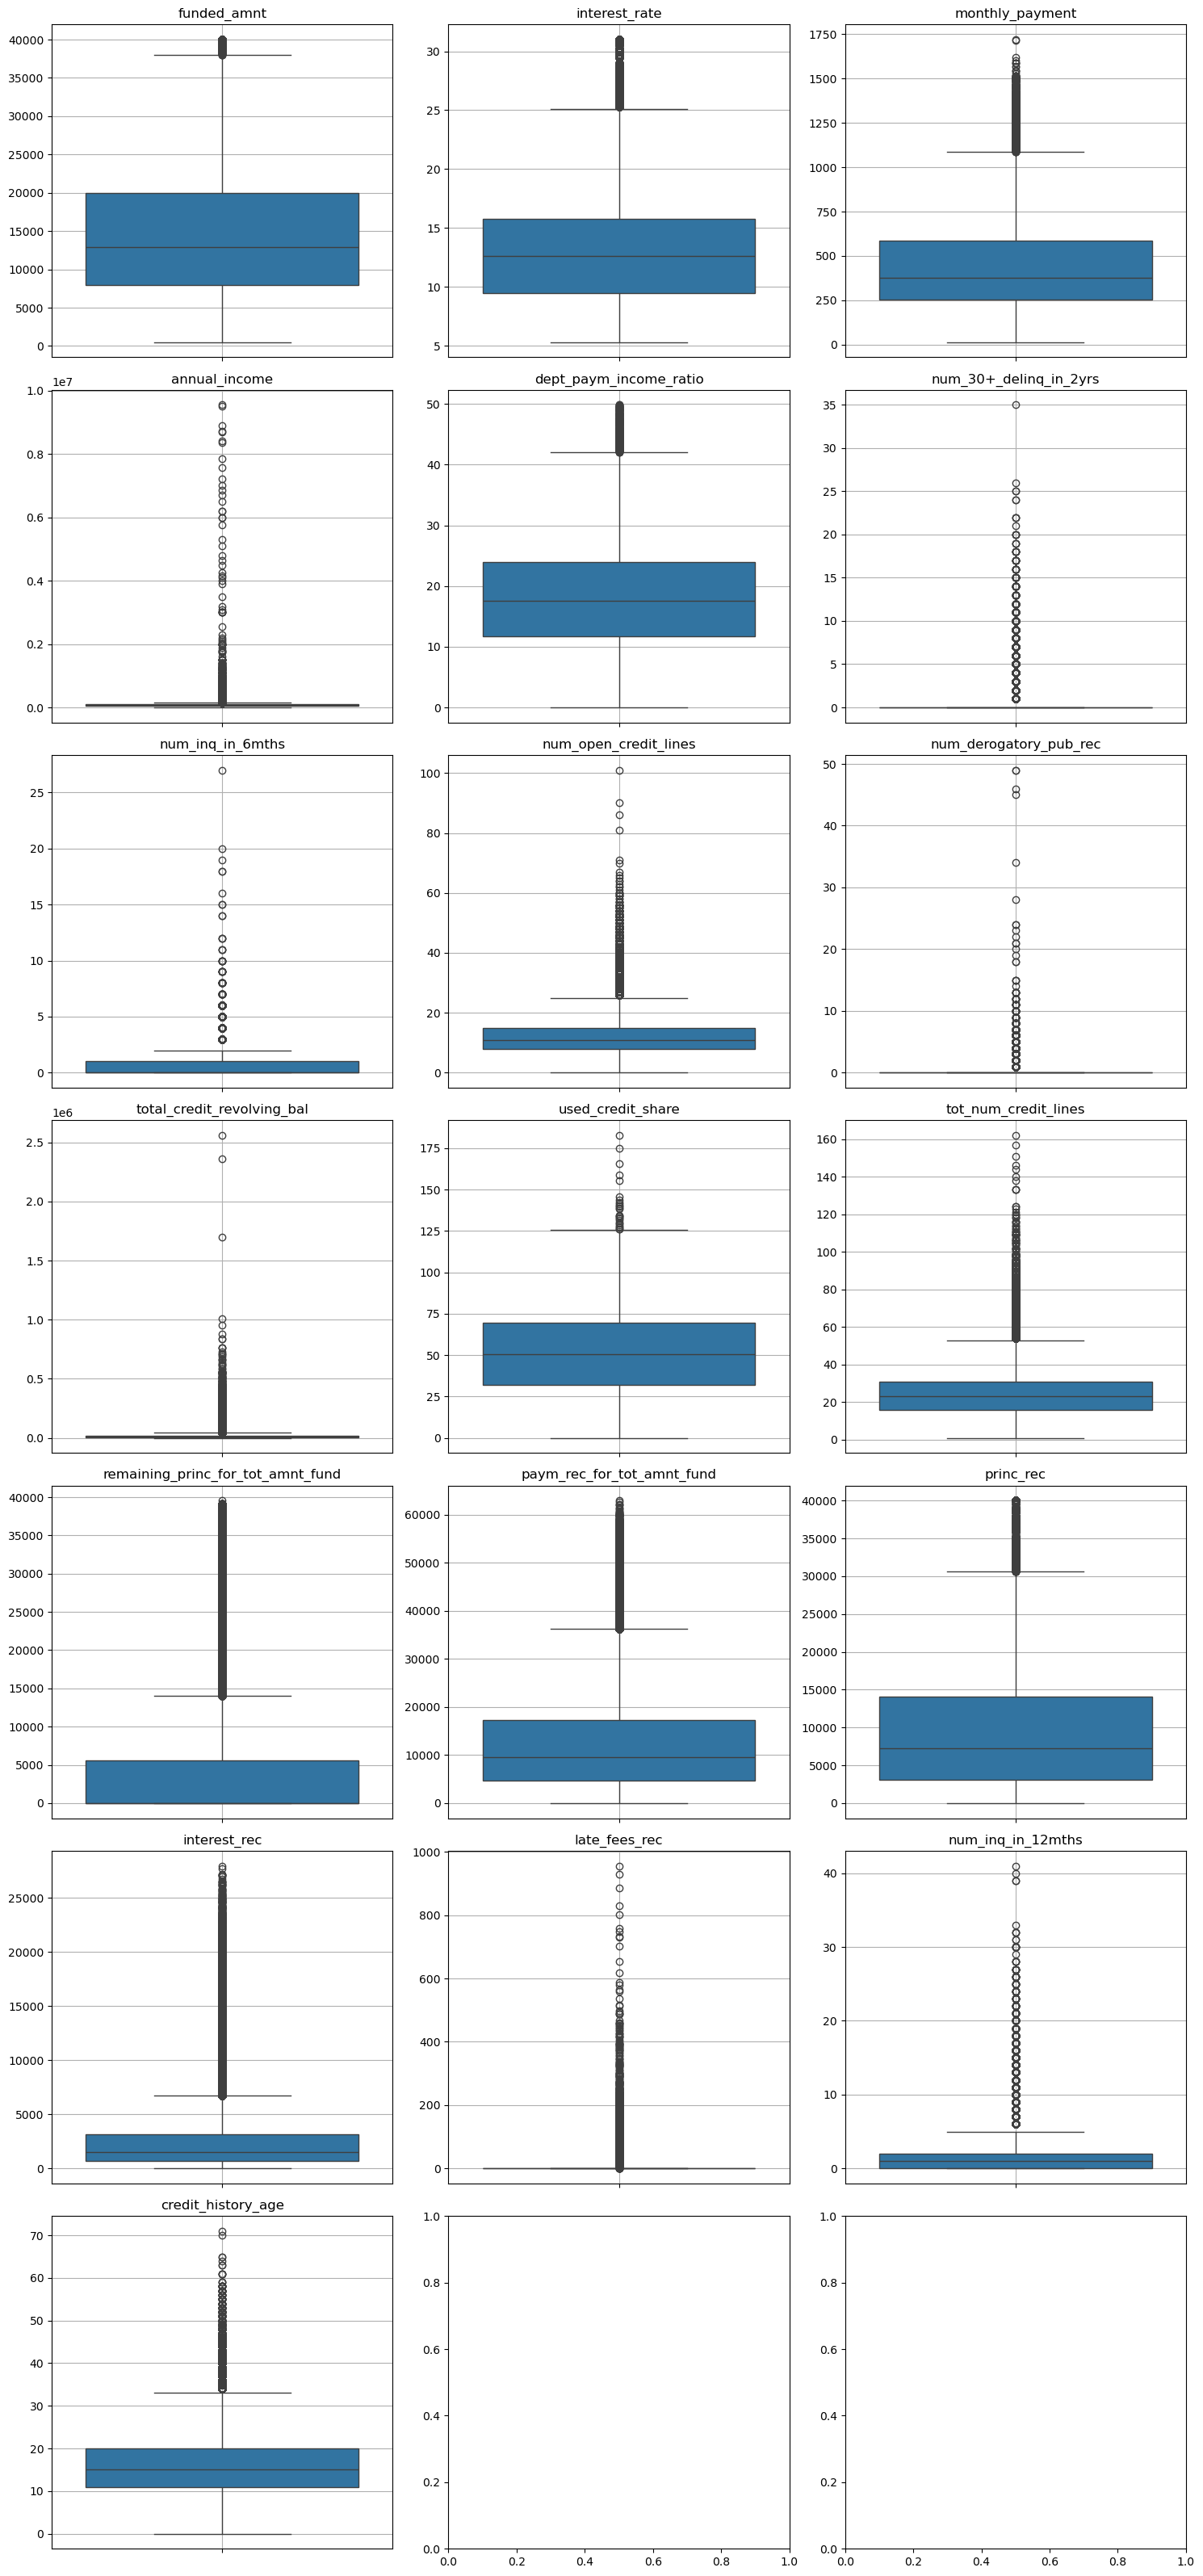

In [29]:
draw_boxplots(numerical_data.drop(columns='target'), subplot_size=(15, 32))

In [30]:
def handle_outliers(df, threshold=1.5, remove=False, replace_val='mean'):
    df_cleaned = df.copy()
    df_numeric = df_cleaned.select_dtypes(include=['int32', 'float32', 'int64', 'float64'])
    
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # data serieses for lower and upper bounds for each numeric column
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    if remove == True:
        # condition for numeric columns for handling outliers
        mask = ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
        df_cleaned_no_outliers = df_cleaned[mask]
        print(f"Customer dataframe INPUT size: {len(df_cleaned)}")
        print(f"Deleted rows containing outliers: {len(mask[mask==False])}")
        print(f"Customer dataframe OUTPUT size: {len(df_cleaned_no_outliers)}")
        return df_cleaned_no_outliers

    else:
        for col in df_numeric.columns:
            col_dtype = df_cleaned[col].dtype
            if replace_val == 'mean':
                replacement_val = df_cleaned[col].mean()
            elif replace_val == 'median':
                replacement_val = df_cleaned[col].median()

            replacement = col_dtype.type(replacement_val) # setting type of the replacement value corresponding to given column
            outlier_mask_col = ((df_cleaned[col] < lower_bound[col]) | (df_cleaned[col] > upper_bound[col]))
            df_cleaned.loc[outlier_mask_col, col] = replacement

        return df_cleaned

<Axes: >

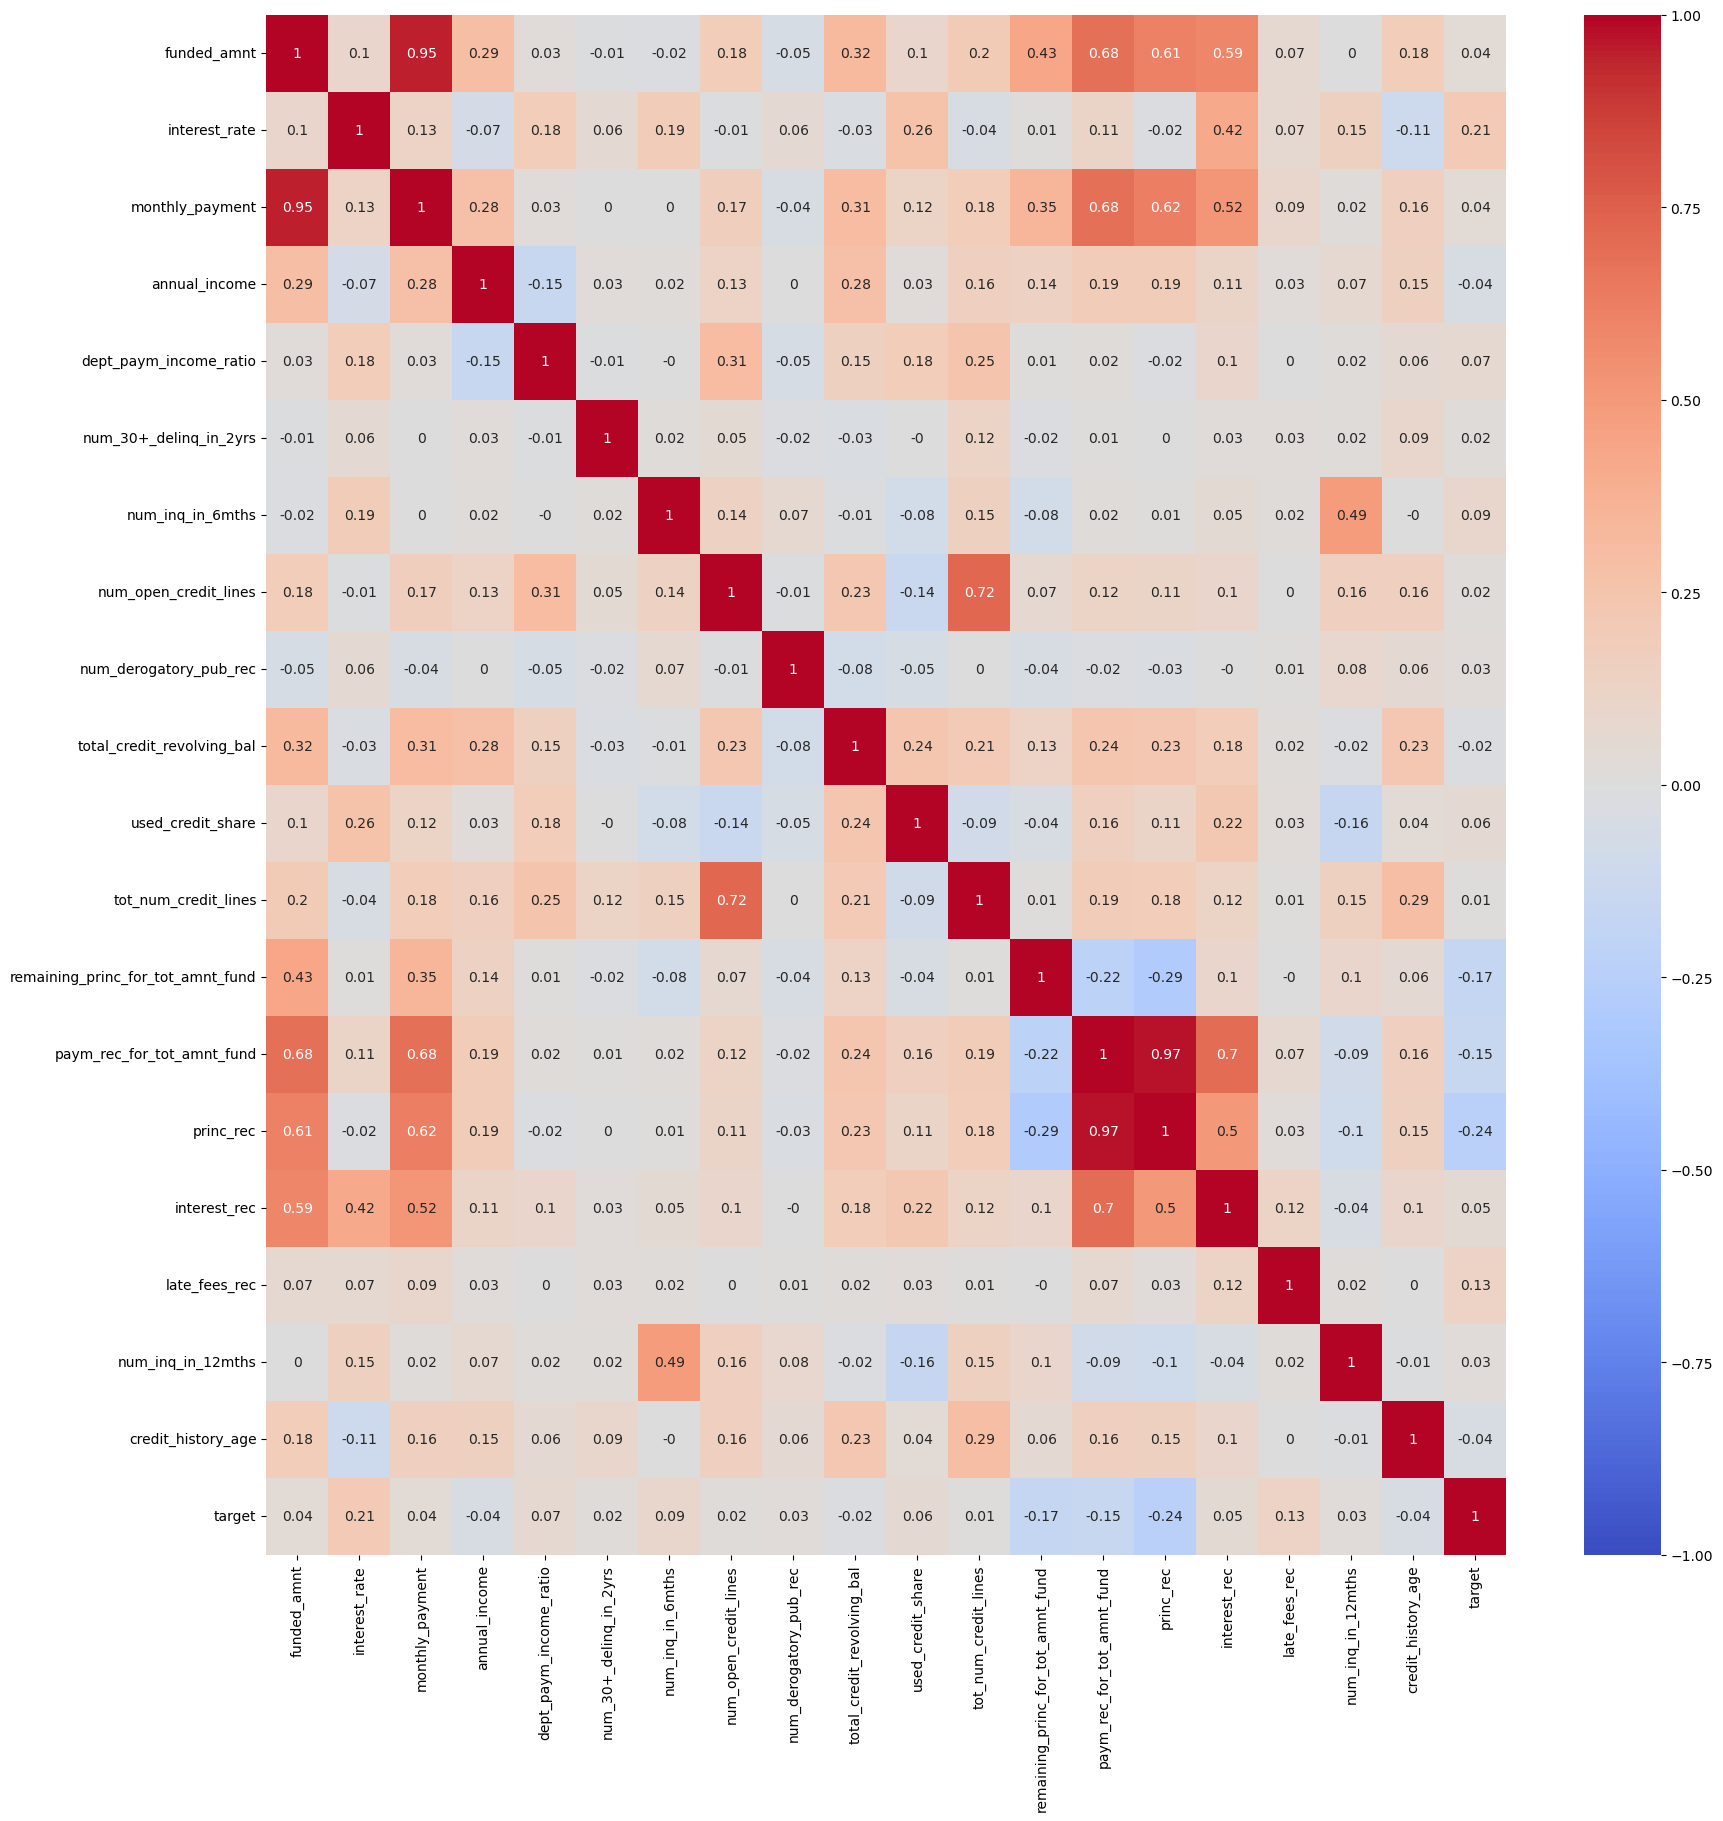

In [31]:
numeric_corr = numerical_data.corr().round(decimals=2)
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

potential columns to reject because of big correlations:
- "monthly_payment", 
- "tot_num_credit_lines"
- "paym_rec_for_tot_amnt_fund" or "princ_rec"

### VIF (Variance Inflation Factor) analysis to determine linearity degree between independent variables

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

"""creating linear models for every independent variable between other independent variables"""
def VIF(numerical_data):    
     X = numerical_data
     X = add_constant(X)

     VIFs = pd.Series(
          [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns
     )
     return VIFs

print(VIF(numerical_data.drop(columns='target')))

const                                26.05
funded_amnt                          18.50
interest_rate                         1.65
monthly_payment                      11.12
annual_income                         1.23
dept_paym_income_ratio                1.29
num_30+_delinq_in_2yrs                1.04
num_inq_in_6mths                      1.40
num_open_credit_lines                 2.29
num_derogatory_pub_rec                1.03
total_credit_revolving_bal            1.36
used_credit_share                     1.31
tot_num_credit_lines                  2.33
remaining_princ_for_tot_amnt_fund     4.88
paym_rec_for_tot_amnt_fund          306.86
princ_rec                           177.02
interest_rec                         25.21
late_fees_rec                         1.03
num_inq_in_12mths                     1.44
credit_history_age                    1.19
dtype: float64


In [33]:
"""dropping cols that have VIF > 10 because then the linearity might significantly affect quality of the model"""
numerical_data = numerical_data.drop(columns=['monthly_payment', 'princ_rec', 'interest_rec', 'tot_num_credit_lines'])
print(VIF(numerical_data.drop(columns='target')))

const                               22.12
funded_amnt                          5.83
interest_rate                        1.25
annual_income                        1.22
dept_paym_income_ratio               1.28
num_30+_delinq_in_2yrs               1.02
num_inq_in_6mths                     1.39
num_open_credit_lines                1.32
num_derogatory_pub_rec               1.03
total_credit_revolving_bal           1.36
used_credit_share                    1.30
remaining_princ_for_tot_amnt_fund    3.21
paym_rec_for_tot_amnt_fund           4.88
late_fees_rec                        1.01
num_inq_in_12mths                    1.42
credit_history_age                   1.13
dtype: float64


In [34]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,10000,8.24,314.48,B1,Operations,5 years,RENT,105000.00,Source Verified,credit_card,VA,14.56,0,0,11,0,17839,60.30,23,w,0.00,10307.05,10000.00,307.05,0.00,1,Cash,36,18,2,0
1,2000,19.92,74.25,D3,Teacher,4 years,RENT,60000.00,Verified,other,TX,19.32,0,0,3,0,0,0.00,8,f,1787.82,370.14,212.18,157.96,0.00,1,Cash,36,7,7,0
2,9800,9.49,313.88,B2,School Nurse,10+ years,RENT,90000.00,Source Verified,debt_consolidation,CA,16.53,1,0,11,0,14601,69.50,35,f,0.00,11294.39,9800.00,1494.39,0.00,0,Cash,36,19,9,0
3,13000,7.84,262.60,A4,Senior Data Analyst,10+ years,MORTGAGE,155000.00,Not Verified,debt_consolidation,NC,5.58,0,1,16,0,5577,7.90,29,w,11916.44,1569.94,1083.56,486.38,0.00,1,Cash,60,15,2,0
4,6000,5.32,180.69,A1,Compliance Manager,2 years,MORTGAGE,86000.00,Not Verified,credit_card,OH,14.76,0,0,6,0,16348,31.30,13,w,0.00,6224.57,6000.00,224.57,0.00,0,Cash,36,19,4,0


In [35]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,398314,398314,398314,398314,398314,398314,398314,398314,398314,398314,398314
unique,35,138897,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,25475,7054,142984,193547,164090,226200,56406,266429,385082,284264,72024


In [36]:
customer_data = customer_data.drop(columns=['grade', 'emp_title', 'addr_state'])
customer_data.select_dtypes('object').describe()

,emp_length,home_ownership_status,verification_status,loan_purpose,initial_list_status,disbursement_method,loan_term_months,region_code
count,398314,398314,398314,398314,398314,398314,398314,398314
unique,11,4,3,14,2,2,2,10
top,10+ years,MORTGAGE,Source Verified,debt_consolidation,w,Cash,36,9
freq,142984,193547,164090,226200,266429,385082,284264,72024


### Categorical values encoding using OneHotEncoder

In [37]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoric_data(df):
    """Encodes categorical columns in the DataFrame using OneHotEncoder."""
    categorical_columns = df.loc[:, df.dtypes == 'object'].columns
    encoding_values = df[categorical_columns].nunique().values
    ohe = OneHotEncoder(sparse_output=False) 
    
    # Fit and transform the categorical columns
    one_hot_encoded = ohe.fit_transform(df[categorical_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, 
                              index=df.index,
                              columns=ohe.get_feature_names_out(categorical_columns)).astype('int32')
    
    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    df_encoded = pd.concat([df, one_hot_df], axis=1)
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    
    for i, (cat_col, encoded_vals) in enumerate(zip(categorical_columns, encoding_values)):
        print(f"{i+1}) {cat_col} - encoded {encoded_vals} categories")
    
    return df_encoded

customer_data = encode_categoric_data(customer_data)

1) emp_length - encoded 11 categories
2) home_ownership_status - encoded 4 categories
3) verification_status - encoded 3 categories
4) loan_purpose - encoded 14 categories
5) initial_list_status - encoded 2 categories
6) disbursement_method - encoded 2 categories
7) loan_term_months - encoded 2 categories
8) region_code - encoded 10 categories


In [38]:
categorical_columns = customer_data.loc[:, customer_data.dtypes == 'object'].columns
customer_data

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,10000,8.24,314.48,105000.00,14.56,0,0,11,0,17839,60.30,23,0.00,10307.05,10000.00,307.05,0.00,1,18,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1,2000,19.92,74.25,60000.00,19.32,0,0,3,0,0,0.00,8,1787.82,370.14,212.18,157.96,0.00,1,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,9800,9.49,313.88,90000.00,16.53,1,0,11,0,14601,69.50,35,0.00,11294.39,9800.00,1494.39,0.00,0,19,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,13000,7.84,262.60,155000.00,5.58,0,1,16,0,5577,7.90,29,11916.44,1569.94,1083.56,486.38,0.00,1,15,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,6000,5.32,180.69,86000.00,14.76,0,0,6,0,16348,31.30,13,0.00,6224.57,6000.00,224.57,0.00,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398309,5350,10.91,174.93,65000.00,21.95,0,0,14,0,11581,31.10,15,0.00,5805.42,5350.00,455.42,0.00,0,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
398310,12300,17.10,439.15,70000.00,27.16,0,3,11,0,9545,53.00,35,0.00,12475.28,12300.00,175.28,0.00,3,12,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
398311,13000,19.03,337.45,60000.00,12.77,0,0,9,0,5179,21.80,18,0.00,13890.93,13000.00,890.93,0.00,4,15,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0
398312,7000,20.39,261.54,46000.00,9.80,0,2,9,0,2778,31.60,12,5789.01,2076.46,1210.99,865.47,0.00,3,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [39]:
customer_data['target'].value_counts()

target
0    346919
1     51395
Name: count, dtype: int64

### Scaling numerical data (MinMax scaling)

In [40]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
cols_to_transform = customer_data.loc[:, :'credit_history_age'].columns

"""creating copy of dataframe because for other methods such us Decision Trees there might not be need to scale data"""
customer_data_scaled = customer_data.copy() 
customer_data_scaled[cols_to_transform] = minmax_scaler.fit_transform( customer_data_scaled[cols_to_transform] )
customer_data_scaled.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,0.24,0.11,0.18,0.01,0.29,0.00,0.00,0.11,0.00,0.01,0.33,0.14,0.00,0.16,0.25,0.01,0.00,0.02,0.25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0.04,0.57,0.04,0.01,0.39,0.00,0.00,0.03,0.00,0.00,0.00,0.04,0.05,0.01,0.01,0.01,0.00,0.02,0.10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.24,0.16,0.18,0.01,0.33,0.03,0.00,0.11,0.00,0.01,0.38,0.21,0.00,0.18,0.25,0.05,0.00,0.00,0.27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.32,0.10,0.15,0.02,0.11,0.00,0.04,0.16,0.00,0.00,0.04,0.17,0.30,0.02,0.03,0.02,0.00,0.02,0.21,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0.14,0.00,0.10,0.01,0.30,0.00,0.00,0.06,0.00,0.01,0.17,0.07,0.00,0.10,0.15,0.01,0.00,0.00,0.27,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


### Logistic Regression Model

In [41]:
from sklearn import linear_model

X = customer_data_scaled.drop(columns='target')
y = customer_data_scaled['target']

start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['target'])
log_regression_model = linear_model.LogisticRegression(class_weight='balanced')

log_regression_model.fit(X_train, y_train)
y_train_probs = log_regression_model.predict_proba(X_train)
y_probs = log_regression_model.predict_proba(X_test)
end_time = time.time()
print(f"Logistic Regression training time: {end_time - start_time:.2f} seconds")
(y_train_probs, y_probs)

Logistic Regression training time: 7.06 seconds


c:\Users\Radek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[0.98364606, 0.01635394],
        [0.90859529, 0.09140471],
        [0.94920336, 0.05079664],
        ...,
        [0.93150735, 0.06849265],
        [0.97428138, 0.02571862],
        [0.00426259, 0.99573741]]),
 array([[0.9908406 , 0.0091594 ],
        [0.96537105, 0.03462895],
        [0.96744394, 0.03255606],
        ...,
        [0.97094083, 0.02905917],
        [0.99021211, 0.00978789],
        [0.90980695, 0.09019305]]))

In [42]:
y_train_val_counts = y_train.value_counts()
y_test_val_counts = y_test.value_counts()

cut_prob = 0.5
y_train_pred = np.where(y_train_probs[:, 0] > cut_prob, 0, 1)
y_pred = np.where(y_probs[:, 0] > cut_prob, 0, 1)

### Confusion Matrices

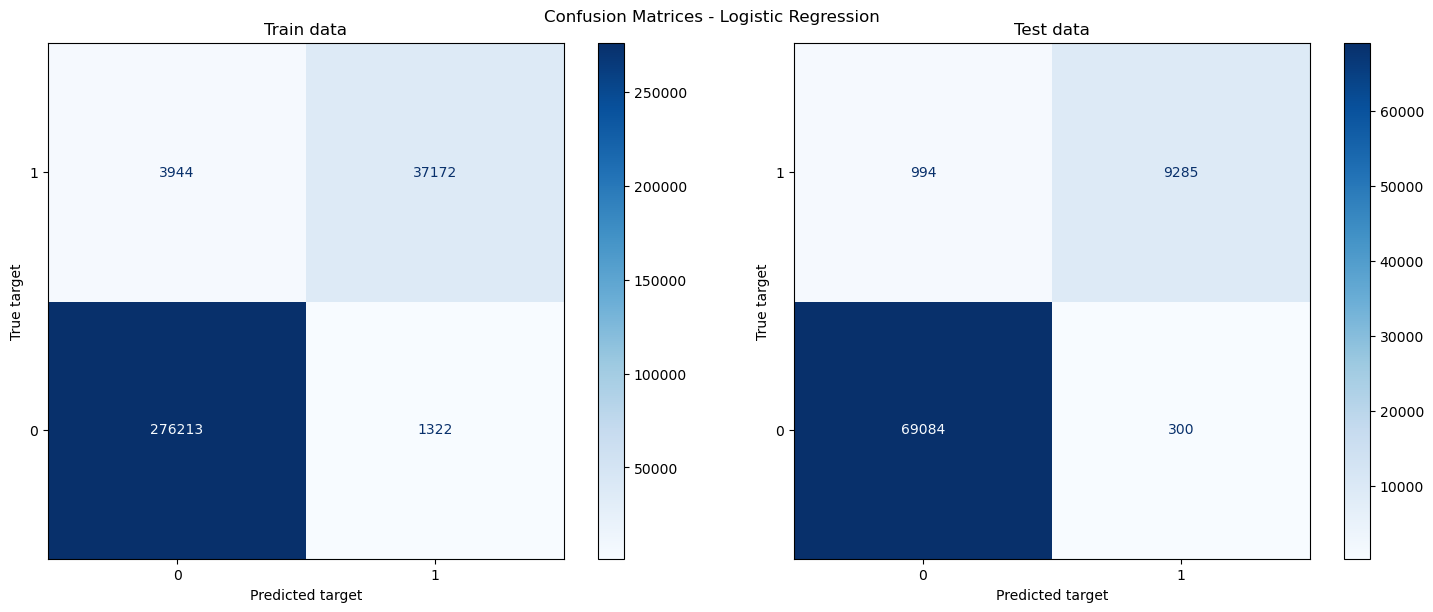

Train data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    277535
           1       0.97      0.90      0.93     41116

    accuracy                           0.98    318651
   macro avg       0.98      0.95      0.96    318651
weighted avg       0.98      0.98      0.98    318651



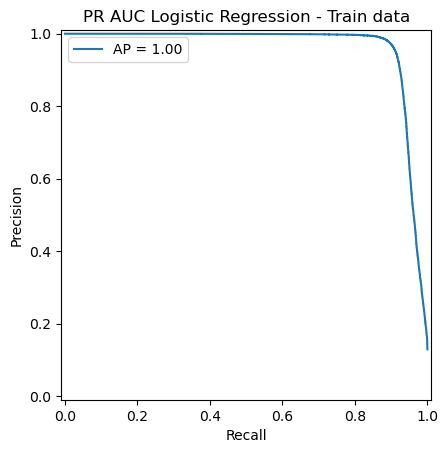


Test data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     69384
           1       0.97      0.90      0.93     10279

    accuracy                           0.98     79663
   macro avg       0.98      0.95      0.96     79663
weighted avg       0.98      0.98      0.98     79663



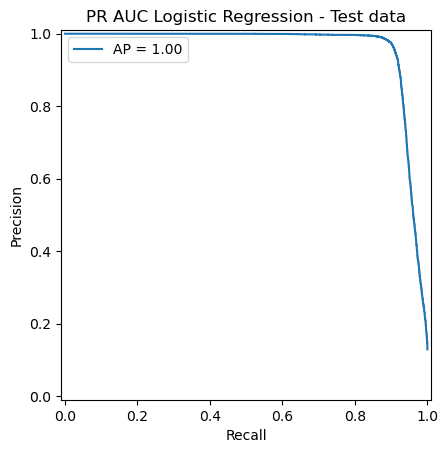

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, \
    f1_score, precision_recall_curve, PrecisionRecallDisplay, classification_report

def display_confusion_matrix(y_train, y_train_pred, y_test, y_pred, title='', cmap='cividis'):
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=[0, 1])
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1])

    cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    cms_disp = [cm_train_disp, cm_test_disp]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)); axes = axes.flatten();
    for i, (ax, cm) in enumerate(zip(axes, cms_disp)):
        cm.plot(ax=ax, cmap=cmap)
        cm_title = 'Train data' if i == 0 else 'Test data'
        ax.set_xlabel('Predicted target')
        ax.set_ylabel('True target')
        ax.set_title(cm_title)
        ax.invert_yaxis()  # Invert y-axis for better readability
    fig.suptitle(t=title)
    plt.tight_layout()
    plt.show()
    return cm_train, cm_test

def display_quality_metrics(y_true, y_pred, y_probs, label='Test data', pr_curve_title=''):
    print(f"{label}:")
    # print(f"Accuracy: {accuracy_score(y_true=y_true, y_pred=y_pred):.2f}")
    # print(f"Precision: {precision_score(y_true=y_true, y_pred=y_pred):.2f}")
    # print(f"Recall score: {recall_score(y_true=y_true, y_pred=y_pred):.2f}")
    # print(f"F1-score: {f1_score(y_true=y_true, y_pred=y_pred):.2f}")
    print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['0', '1']))
    precisions, recalls, _ = precision_recall_curve(y_true=y_true, probas_pred=y_probs[:, 1])
    pr_curve_disp = PrecisionRecallDisplay(precision=precisions, recall=recalls, average_precision=True)
    pr_curve_disp.plot()
    plt.title(pr_curve_title)
    plt.legend()
    plt.show()

cm_train_LR, cm_test_LR = display_confusion_matrix(y_train=y_train, y_train_pred=y_train_pred, 
                                             y_test=y_test, y_pred=y_pred, 
                                             title='Confusion Matrices - Logistic Regression', cmap='Blues')
display_quality_metrics(y_true=y_train, 
                        y_pred=y_train_pred, 
                        y_probs=y_train_probs, 
                        label='Train data', 
                        pr_curve_title='PR AUC Logistic Regression - Train data')
display_quality_metrics(y_true=y_test, 
                        y_pred=y_pred, 
                        y_probs=y_probs,
                        label='\nTest data',
                        pr_curve_title='PR AUC Logistic Regression - Test data')

### PCA Visualization - Logistic Regression

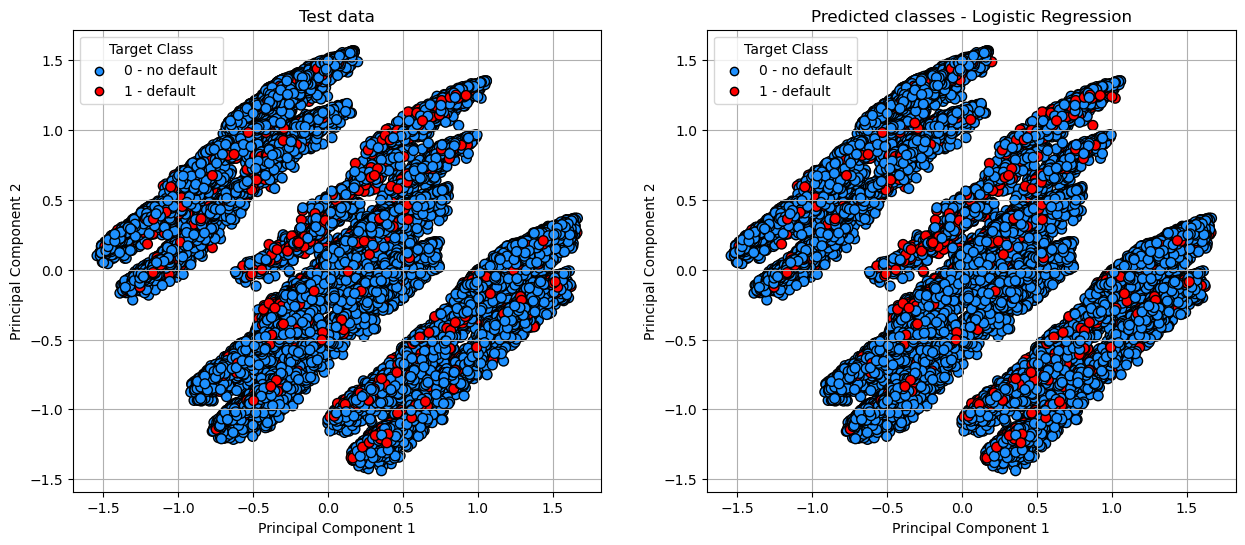

In [44]:
from sklearn.decomposition import PCA

def pca_visualization(X_true, y_true, y_pred, model_name=''):
    """Visualizes PCA components of the training data."""
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_true)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    axes = axes.flatten() 
    colors_dict = {0: 'dodgerblue', 1: 'red'} # colors dictionary for classes
    encoded_scoring = {0: 'no default', 1: 'default'}  # encoded scoring categories for classes
    """Plotting PCA components for true and predicted classes"""
    for i, (ax, y) in enumerate(zip(axes, [y_true, y_pred])):
        colors = [colors_dict[label] for label in y]
        scatter = ax.scatter(components[:, 0], components[:, 1], c=colors, edgecolor='k', s=50)
        title = 'Test data' if i == 0 else f'Predicted classes - {model_name}'
        ax.set_title(title)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.grid(True)

        """Legend"""
        for class_value, color in colors_dict.items():
            ax.scatter([], [], c=color, label=f'{class_value} - {encoded_scoring[class_value]}', edgecolor='k')
        ax.legend(title='Target Class')

pca_visualization(X_test, y_test, y_pred, model_name='Logistic Regression')

### XGBoost algorithm

In [45]:
import torch
"""setting device"""
device = 'cuda' if torch.cuda.is_available() else 'cpu'

c:\Users\Radek\anaconda3\Lib\site-packages\xgboost\core.py:729: UserWarning: [13:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


XGBoost training time: 8.85 seconds


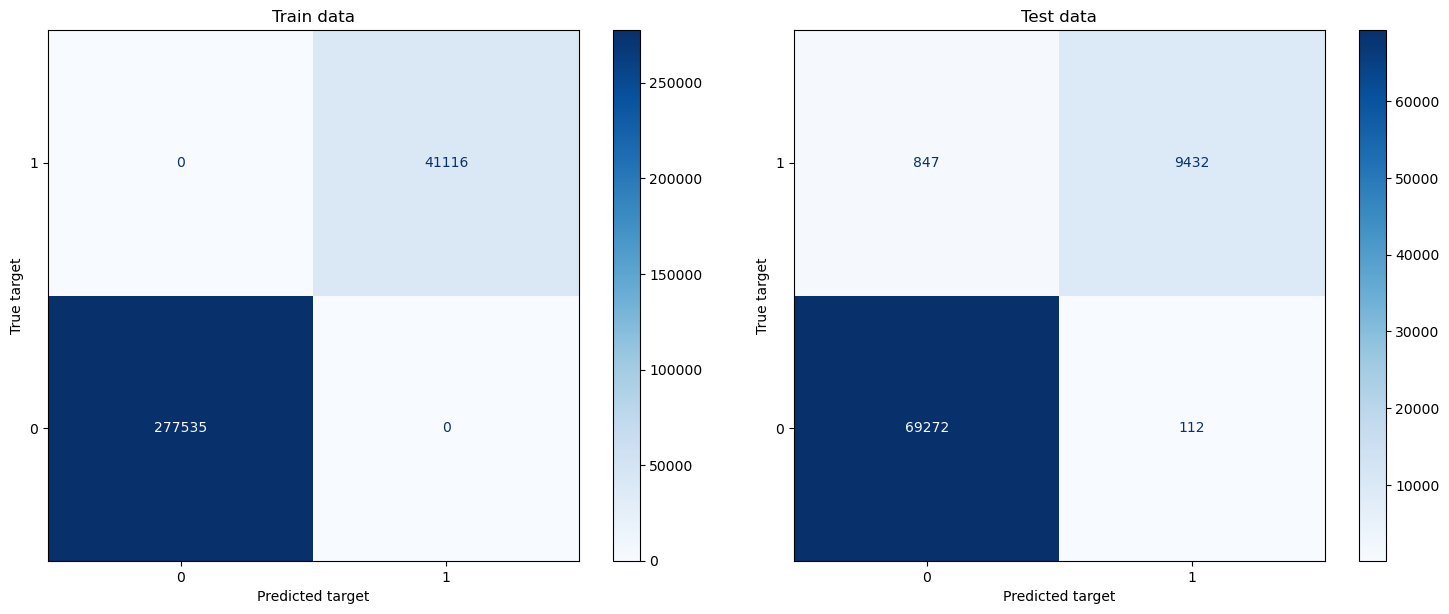

Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    277535
           1       1.00      1.00      1.00     41116

    accuracy                           1.00    318651
   macro avg       1.00      1.00      1.00    318651
weighted avg       1.00      1.00      1.00    318651



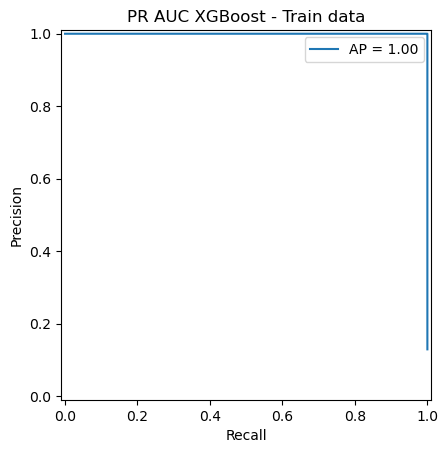


Test data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     69384
           1       0.99      0.92      0.95     10279

    accuracy                           0.99     79663
   macro avg       0.99      0.96      0.97     79663
weighted avg       0.99      0.99      0.99     79663



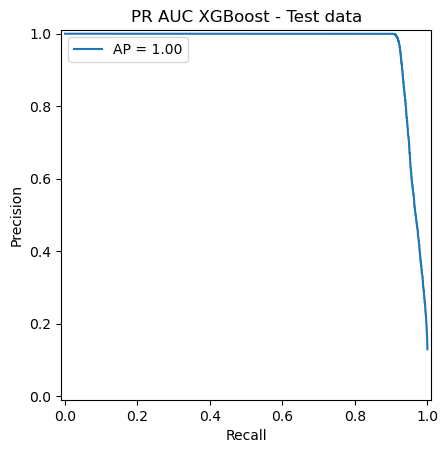

In [46]:
import xgboost as xgb

"""Prepare data for XGBoost but also other Decision Tree-based models"""
X = customer_data_scaled.drop(columns='target')
y = customer_data_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['target'])

val_counts = customer_data['target'].value_counts()
class_freq_ratio = val_counts.get(0, 0) / val_counts.get(1, 0)

start_time = time.time()
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=1000,
    scale_pos_weight=class_freq_ratio,
    device=device
)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

xgb_model.fit(X_train, y_train)
y_pred_XGB_train = xgb_model.predict(X_train)
y_pred_XGB_test = xgb_model.predict(X_test)

end_time = time.time()
print(f"XGBoost training time: {end_time - start_time:.2f} seconds")

cm_train_XGB, cm_test_XGB = display_confusion_matrix(y_train=y_train, 
                                                     y_train_pred=y_pred_XGB_train,
                                                     y_test=y_test, y_pred=y_pred_XGB_test, 
                                                     cmap="Blues")
display_quality_metrics(y_true=y_train,
                        y_pred=y_pred_XGB_train,
                        y_probs=xgb_model.predict_proba(X_train),
                        label='Train data',
                        pr_curve_title='PR AUC XGBoost - Train data')
display_quality_metrics(y_true=y_test,
                        y_pred=y_pred_XGB_test,
                        y_probs=xgb_model.predict_proba(X_test),
                        label='\nTest data',            
                        pr_curve_title='PR AUC XGBoost - Test data')

### PCA Visualization - XGBoost

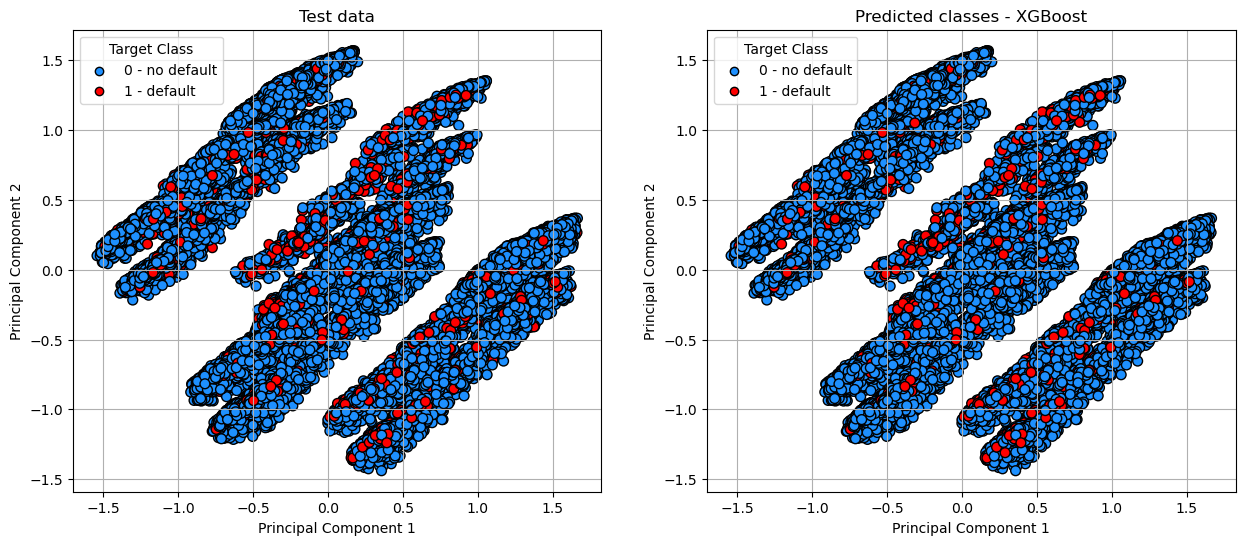

In [47]:
pca_visualization(X_test, y_test, y_pred_XGB_test, model_name='XGBoost')

### Random Forest Classifier 

Random Forest training time: 74.11 seconds


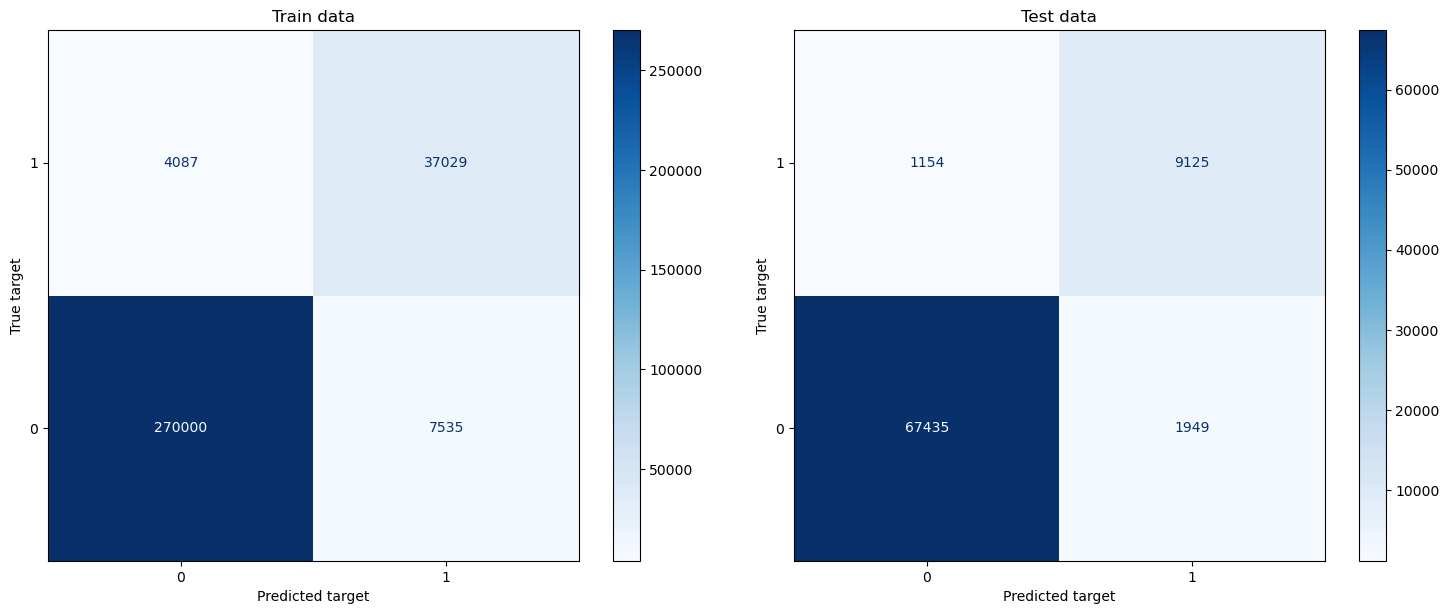

Train data:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    277535
           1       0.83      0.90      0.86     41116

    accuracy                           0.96    318651
   macro avg       0.91      0.94      0.92    318651
weighted avg       0.97      0.96      0.96    318651



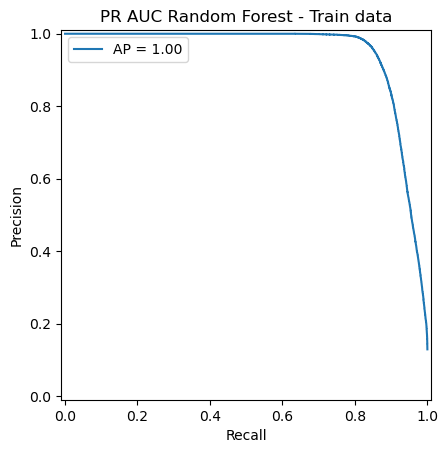


Test data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     69384
           1       0.82      0.89      0.85     10279

    accuracy                           0.96     79663
   macro avg       0.90      0.93      0.92     79663
weighted avg       0.96      0.96      0.96     79663



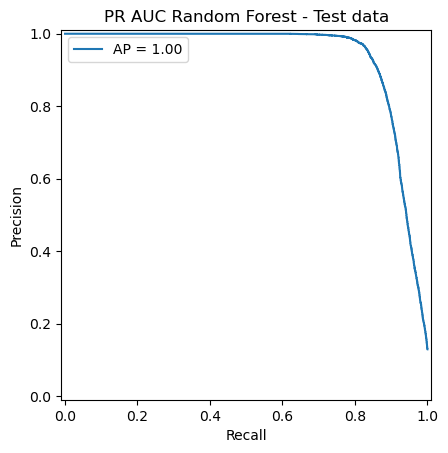

In [48]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced_subsample',
    random_state=68,
    n_jobs=4
)

rf_model.fit(X_train, y_train)
y_pred_RF_train = rf_model.predict(X_train) 
y_pred_RF_test = rf_model.predict(X_test)
end_time = time.time()
print(f"Random Forest training time: {end_time - start_time:.2f} seconds")
cm_train_RF, cm_test_RF = display_confusion_matrix(y_train=y_train, y_train_pred=y_pred_RF_train,
                                                   y_test=y_test, y_pred=y_pred_RF_test, cmap="Blues")  
display_quality_metrics(y_true=y_train,
                        y_pred=y_pred_RF_train,
                        y_probs=rf_model.predict_proba(X_train),
                        label='Train data',
                        pr_curve_title='PR AUC Random Forest - Train data')
display_quality_metrics(y_true=y_test,  
                        y_pred=y_pred_RF_test,
                        y_probs=rf_model.predict_proba(X_test),
                        label='\nTest data',
                        pr_curve_title='PR AUC Random Forest - Test data')

### PCA Visualization - Random Forest 

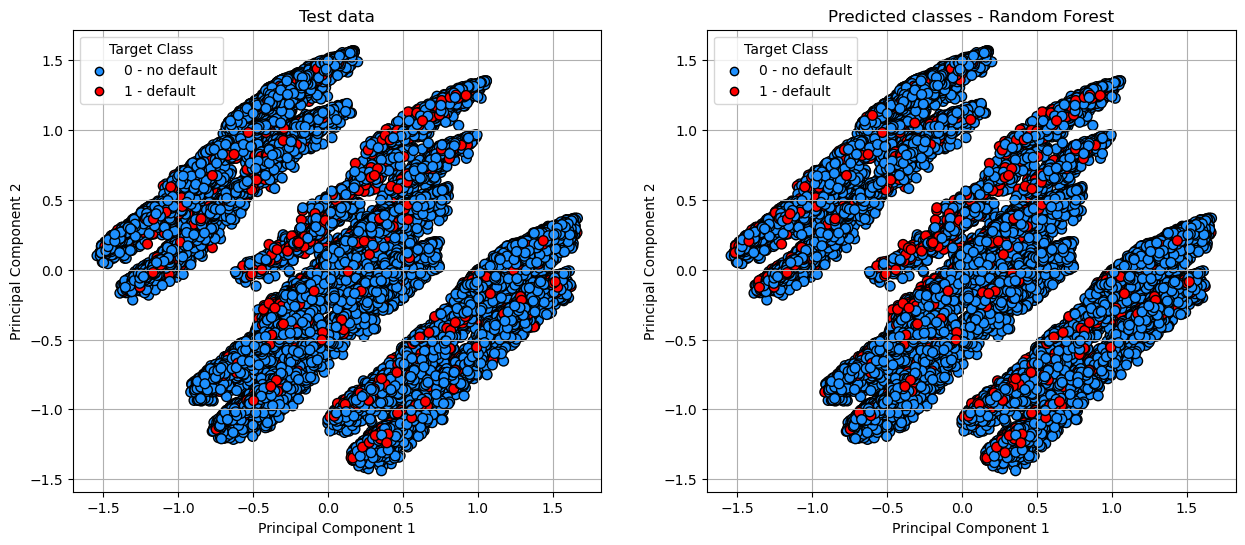

In [49]:
pca_visualization(X_test, y_test, y_pred_RF_test, model_name='Random Forest')

In [50]:
gloabl_end_time = time.time()
print(f"Total execution time: {gloabl_end_time - gloabl_start_time:.2f} seconds")

Total execution time: 218.65 seconds
